# Fraud Detection in Financial Transactions Using Machine Learning

# Importing all required libraries
pandas: For data manipulation and analysis.

train_test_split (from sklearn.model_selection): To split data into training and test sets.

StandardScaler: For feature scaling (standardization).

SVC: Support Vector Classifier for training the model.

accuracy_score, classification_report, confusion_matrix: For evaluating model performance.

pickle: For saving and loading the trained model.

matplotlib.pyplot: For creating and displaying plots (e.g., confusion matrix).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import matplotlib.pyplot as plt 

## Class: Data
This class handles data loading and basic exploratory data analysis (EDA) from a CSV file.
It provides utility methods to:

Load and copy the dataset safely.

Display the first, last, or random rows.

Print structure and summary statistics.

Access shape and column names.

Retrieve central tendencies (mean, median, mode).

Get or update the internal DataFrame for further processing.

In [30]:
class Data:
    """
    A utility class for loading and exploring a dataset from a CSV file.
    """

    def __init__(self, file_path):
        """
        Initializes the Data class by loading data from a CSV file.

        Parameters:
            file_path (str): Path to the CSV file to load.
        """
        self.df = pd.read_csv(file_path)
        print(f"[INFO] Data loaded from: {file_path}")

    def display_head(self, n=5):
        """
        Returns the first `n` rows of the DataFrame.

        Parameters:
            n (int, optional): Number of rows to return from the top. Default is 5.

        Returns:
            pd.DataFrame: Top `n` rows.
        """
        return self.df.head(n)

    def display_tail(self, n=5):
        """
        Returns the last `n` rows of the DataFrame.

        Parameters:
            n (int, optional): Number of rows to return from the bottom. Default is 5.

        Returns:
            pd.DataFrame: Bottom `n` rows.
        """
        return self.df.tail(n)

    def display_sample(self, n=5):
        """
        Returns a random sample of `n` rows from the DataFrame.

        Parameters:
            n (int, optional): Number of random rows to sample. Default is 5.

        Returns:
            pd.DataFrame: Random `n` rows.
        """
        return self.df.sample(n)

    def get_info(self):
        """
        Prints a concise summary of the DataFrame, including column dtypes and non-null counts.
        """
        self.df.info()

    def get_description(self):
        """
        Returns descriptive statistics for numeric columns.

        Returns:
            pd.DataFrame: Summary statistics like mean, std, min, max, etc.
        """
        return self.df.describe()

    def get_shape(self):
        """
        Returns the shape of the DataFrame.

        Returns:
            tuple: Number of rows and columns in the format (rows, columns).
        """
        return self.df.shape

    def get_columns(self):
        """
        Returns the column names of the DataFrame.
        """
        return self.df.columns

    def get_mean(self):
        """
        Computes the mean for each numeric column in the DataFrame.

        Returns:
            pd.Series: Mean values of all numeric columns.
        """
        return self.df.mean(numeric_only=True)

    def get_median(self):
        """
        Computes the median for each numeric column in the DataFrame.

        Returns:
            pd.Series: Median values of all numeric columns.
        """
        return self.df.median(numeric_only=True)

    def get_mode(self):
        """
        Computes the mode for each column in the DataFrame.

        Returns:
            pd.DataFrame: Mode(s) of the columns. Can return multiple rows if multiple modes exist.
        """
        return self.df.mode()

    def get_data(self):
        """
        Returns the current working copy of the DataFrame.

        Returns:
            pd.DataFrame: Modifiable DataFrame.
        """
        return self.df

    def set_data(self, new_df: pd.DataFrame):
        """
        Updates the internal DataFrame with a new one.

        Parameters:
            new_df (pd.DataFrame): A new DataFrame to replace the current working copy.
        """
        self.df = new_df


## Class: DataPreprocessing
Initializes the DataPreprocessing class with the dataset.

Selects relevant columns for analysis.

Checks for missing values.

Encodes the 'Channel' column using label encoding.

Updates the main DataFrame after each step for consistency.

In [31]:
class DataPreprocessing:
    """
    Handles data preprocessing steps.
    """
    def __init__(self, dataframe):
        """
        Initializes with a DataFrame.
        Parameters:
            Dataframe : Input Dataframe.
        """
        self.df = dataframe

    def select_columns(self, columns_to_keep: list):
        """
        Selects specified columns.
        Parameters:
            columns_to_keep (list): List of column names to keep.
        Returns:
            DataFrame: DataFrame with selected columns.
        """
        self.df = self.df[columns_to_keep]
        return self.df

    def check_null_values(self):
        """
        Checks for null values.
        Returns:    
            Series: Sum of null values per column.
        """
        return self.df.isnull().sum()

    def label_encode_column(self, column_name: str, new_column_name: str, value_map: dict):
        """
        Encodes any categorical column using a custom map.
        Parameters:
            column_name (str): Name of the column to encode.
            new_column_name (str): Name for the new encoded column.
            value_map (dict): Dictionary mapping original values to encoded values.
        Returns:
            DataFrame: DataFrame with the encoded column.
        """
        self.df[new_column_name] = self.df[column_name].map(value_map)
        return self.df


## Class: Graph
This class provides utilities to plot bar charts from a pandas DataFrame.
It supports plotting value counts of categorical columns, binned numeric columns, and grouped pandas Series.
The class includes options for customizing colors, figure size, axis labels, and tick label rotation.


Plots bar charts based on value counts of a specified column.

Creates bar charts by binning numeric data with custom bins and labels.

Visualizes grouped data from pandas Series, such as output from groupby operations.

Includes input validation and error handling to ensure robust plotting.## Class: Graph
This class is designed to create various types of bar charts from a given pandas DataFrame.

In [32]:
class Graph:
    """
    Provides plotting utilities for a pandas DataFrame.
    """

    def __init__(self, dataframe: pd.DataFrame):
        """
        Initializes the Graph object with a DataFrame.

        Parameters:
            dataframe (pd.DataFrame): DataFrame to plot data from.
        """
        self.df = dataframe

    def plot_bar_from_value_counts(self, column_name: str, title: str, xlabel: str,
                                   ylabel: str, color='skyblue', figsize: tuple = (8, 5),
                                   rotation: int = 0, sort_index: bool = True):
        """
        Plots a bar chart of value counts of a specified column.

        Parameters:
            column_name (str): Column to count values from.
            title (str): Plot title.
            xlabel (str): Label for the X-axis.
            ylabel (str): Label for the Y-axis.
            color (str or list): Color(s) of bars. Default is 'skyblue'.
            figsize (tuple): Figure size in inches (width, height). Default (8,5).
            rotation (int): Rotation angle for X-axis tick labels. Default 0.
            sort_index (bool): Whether to sort the index before plotting. Default True.

        Raises:
            KeyError: If the specified column is not in the DataFrame.
        """
        if column_name not in self.df.columns:
            raise KeyError(f"Column '{column_name}' not found in DataFrame.")

        data_to_plot = self.df[column_name].value_counts()
        if sort_index:
            data_to_plot = data_to_plot.sort_index()

        ax = data_to_plot.plot(kind='bar', color=color, figsize=figsize, title=title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        plt.xticks(rotation=rotation)
        plt.tight_layout()
        plt.show()

    def plot_binned_bar(self, column_name: str, bins: list, labels: list,
                        title: str, xlabel: str, ylabel: str,
                        color='purple', figsize: tuple = (8, 5), rotation: int = 0):
        """
        Plots a bar chart based on binned values of a numeric column.

        Parameters:
            column_name (str): Column name to bin.
            bins (list): Edges to define bins.
            labels (list): Labels corresponding to bins.
            title (str): Plot title.
            xlabel (str): Label for X-axis.
            ylabel (str): Label for Y-axis.
            color (str or list): Color(s) for bars. Default 'purple'.
            figsize (tuple): Figure size (width, height). Default (8,5).
            rotation (int): Rotation angle for X-axis labels. Default 0.

        Raises:
            KeyError: If the specified column is not in the DataFrame.
            ValueError: If bins and labels lengths do not align.
        """
        if column_name not in self.df.columns:
            raise KeyError(f"Column '{column_name}' not found in DataFrame.")
        if len(labels) != (len(bins) - 1):
            raise ValueError("Length of labels must be one less than length of bins.")

        binned = pd.cut(self.df[column_name], bins=bins, labels=labels, right=False)
        binned_counts = binned.value_counts().sort_index()

        ax = binned_counts.plot(kind='bar', color=color, figsize=figsize, title=title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        plt.xticks(rotation=rotation)
        plt.tight_layout()
        plt.show()

    def plot_grouped_bar_from_series(self, data_series: pd.Series, title: str,
                                     xlabel: str, ylabel: str,
                                     color='orange', figsize: tuple = (8, 5), rotation: int = 45):
        """
        Plots a bar chart from a given pandas Series (like groupby output).

        Parameters:
            data_series (pd.Series): Series data to plot.
            title (str): Plot title.
            xlabel (str): Label for X-axis.
            ylabel (str): Label for Y-axis.
            color (str or list): Bar color(s). Default 'orange'.
            figsize (tuple): Figure size (width, height). Default (8,5).
            rotation (int): Rotation angle for X-axis labels. Default 45.

        Raises:
            ValueError: If input is not a pandas Series.
        """
        if not isinstance(data_series, pd.Series):
            raise ValueError("Input must be a pandas Series.")

        ax = data_series.plot(kind='bar', color=color, figsize=figsize, title=title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        plt.xticks(rotation=rotation)
        plt.tight_layout()
        plt.show()


# UnivariateAnalysis
This class performs univariate analysis and visualization on individual features of a financial transactions dataset.
It provides methods to analyze and plot distributions of key variables like transaction amount, customer age, login attempts, account balance, and transaction channels.

Main features include:

Analyze TransactionAmount by binning values into intervals and plotting their frequencies.

Group CustomerAge into age bins and visualize customer distribution by age group.

Display frequency counts for LoginAttempts to understand login behavior.

Bin and plot AccountBalance distribution for insight into customer balances.

Visualize categorical Channel distribution showing transaction counts by channel type.

The class leverages a separate Graph plotting utility for creating bar charts and binned visualizations.
It accepts a preprocessed DataFrame and a Graph instance for flexible and reusable plotting.

In [33]:
class UnivariateAnalysis:
    """
    Performs univariate analysis and visualizations on transaction dataset.
    """

    def __init__(self, dataframe: pd.DataFrame, graph_plotter: Graph):
        """
        Initialize with DataFrame and Graph object.

        Parameters:
            dataframe (pd.DataFrame): DataFrame for analysis.
            graph_plotter (Graph): Graph plotting utility instance.
        """
        self.df = dataframe 
        self.graph_plotter = graph_plotter

    def analyze_transaction_amount(self, step: int = 300):
        """
        Analyze and plot distribution of 'TransactionAmount' with bins.

        Parameters:
            step (int): Bin width for amount groups. Default is 300.
        """
        print("--- Univariate Analysis: Transaction Amount ---")
        if 'TransactionAmount' not in self.df.columns:
            print("Warning: 'TransactionAmount' column missing in DataFrame.")
            return

        max_amount = self.df['TransactionAmount'].max()
        bins = list(range(0, int(max_amount) + step, step))
        bins.append(float('inf'))
        labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-2)] + [f"{bins[-2]}+"]

        self.graph_plotter.plot_binned_bar(
            column_name='TransactionAmount',
            bins=bins,
            labels=labels,
            title='Transaction Amount Groups',
            xlabel='Amount Group',
            ylabel='Frequency',
            color='purple',
            rotation=45
        )

    def analyze_customer_age(self, bin_width: int = 10, max_age_limit: int = 80):
        """
        Analyze and plot distribution of 'CustomerAge' in bins.
        """
        print("--- Univariate Analysis: Customer Age ---")
        if 'CustomerAge' not in self.df.columns:
            print("Warning: 'CustomerAge' column missing in DataFrame.")
            return

        age_bins = list(range(0, max_age_limit + bin_width, bin_width))
        age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins)-1)]

        self.graph_plotter.plot_binned_bar(
            column_name='CustomerAge',
            bins=age_bins,
            labels=age_labels,
            title='Customer Age Groups',
            xlabel='Age Group',
            ylabel='Frequency',
            color='teal'
        )

    def analyze_login_attempts(self):
        """
        Analyze and plot frequency distribution of 'LoginAttempts'.
        """
        print("--- Univariate Analysis: Login Attempts ---")
        if 'LoginAttempts' not in self.df.columns:
            print("Warning: 'LoginAttempts' column missing in DataFrame.")
            return

        self.graph_plotter.plot_bar_from_value_counts(
            column_name='LoginAttempts',
            title='Login Attempts Frequency',
            xlabel='Number of Login Attempts',
            ylabel='Frequency',
            color='green'
        )

    def analyze_account_balance(self, step: int = 2000):
        """
        Analyze and plot distribution of 'AccountBalance' with bins.

        Parameters:
            step (int): Bin width for balance groups. Default 2000.
        """
        print("--- Univariate Analysis: Account Balance ---")
        if 'AccountBalance' not in self.df.columns:
            print("Warning: 'AccountBalance' column missing in DataFrame.")
            return

        max_balance = self.df['AccountBalance'].max()
        bins = list(range(0, int(max_balance) + step, step))
        bins.append(float('inf'))
        labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-2)] + [f"{bins[-2]}+"]

        self.graph_plotter.plot_binned_bar(
            column_name='AccountBalance',
            bins=bins,
            labels=labels,
            title='Account Balance Groups',
            xlabel='Balance Group',
            ylabel='Frequency',
            color='purple',
            rotation=45
        )

    def analyze_channel_distribution(self):
        """
        Analyze and plot distribution of categorical 'Channel' column.
        """
        print("--- Channel Distribution ---")
        if 'Channel' not in self.df.columns:
            print("Warning: 'Channel' column missing in DataFrame.")
            return

        self.graph_plotter.plot_bar_from_value_counts(
            column_name='Channel',
            title='Transaction Count by Channel',
            xlabel='Channel',
            ylabel='Number of Transactions',
            color=['blue', 'green', 'orange'],
            figsize=(6, 4)
        )


## Class: BivariateAnalysis
This class performs bivariate analysis to explore relationships between various features and fraud occurrences in the dataset.
It is designed to work with a DataFrame, a plotting utility, and a specified fraud target column.

It provides methods to:

Analyze fraud counts by binned numeric features such as Account Balance, Customer Age, and Transaction Amount.

Visualize fraud distribution across categorical variables like Channel and Login Attempts.

Automatically handle binning with flexible step or bin width parameters for numeric features.

Plot results using the provided Graph plotting utility, supporting clear and customizable visualizations.

The class ensures all analyses focus only on fraud transactions, enabling targeted insights into fraudulent behavior patterns.


In [34]:
class BivariateAnalysis:
    """
    Performs bivariate analysis focused on the relationship between features and fraud.
    """

    def __init__(self, dataframe: pd.DataFrame, graph_plotter: Graph, target_col: str = 'is_fraud'):
        """
        Initializes the BivariateAnalysis object with the DataFrame, plotter, and target column.

        Parameters:
            dataframe (pd.DataFrame): DataFrame to analyze.
            graph_plotter (Graph): Graph object used for plotting.
            target_col (str): Name of the target fraud column. Default is 'is_fraud'.
        """
        self.df = dataframe
        self.graph_plotter = graph_plotter
        self.target_col = target_col
        self.fraud_df = self.df[self.df[self.target_col] == 1].copy()

    def _plot_fraud_by_binned_feature(self, feature: str, step: int = None, bin_width: int = None, 
                                      max_limit: int = None, color='orange', xlabel: str = None, rotation: int = 45):
        """
        Helper method to plot fraud counts by binned numeric feature.

        Parameters:
            feature (str): Column name to bin and analyze.
            step (int): Step size for numeric binning. Used if bin_width is None.
            bin_width (int): Alternative to step, for age or similar features.
            max_limit (int): Upper limit for binning range.
            color (str): Color for the bar plot.
            xlabel (str): Label for the X-axis. Defaults to feature name if None.
            rotation (int): X-axis label rotation. Default 45.
        """
        max_value = int(self.fraud_df[feature].max()) if max_limit is None else max_limit
        if bin_width is not None:
            bins = list(range(0, max_value + bin_width, bin_width)) + [float('inf')]
            labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-2)] + [f'{bins[-2]}+']
        elif step is not None:
            bins = list(range(0, max_value + step, step)) + [float('inf')]
            labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-2)] + [f'{bins[-2]}+']
        else:
            raise ValueError("Either step or bin_width must be provided.")

        binned_feature = pd.cut(self.fraud_df[feature], bins=bins, labels=labels, right=False)
        self.fraud_df[f'{feature}Group'] = binned_feature
        fraud_counts = self.fraud_df.groupby(f'{feature}Group', observed=True).size()

        self.graph_plotter.plot_grouped_bar_from_series(
            data_series=fraud_counts,
            title=f'Fraud Count by {feature} Group',
            xlabel=xlabel if xlabel else feature,
            ylabel='Number of Fraud Transactions',
            color=color,
            rotation=rotation
        )

    def analyze_fraud_by_account_balance(self, step: int = 2000):
        """
        Plots fraud counts binned by 'AccountBalance'.

        Parameters:
            step (int): Bin step size. Default 2000.
        """
        print("--- Bivariate Analysis: Fraud by Account Balance ---")
        self._plot_fraud_by_binned_feature('AccountBalance', step=step, color='orange', xlabel='Account Balance Group')

    def analyze_fraud_by_customer_age(self, bin_width: int = 10, max_age_limit: int = 70):
        """
        Plots fraud counts binned by 'CustomerAge'.

        Parameters:
            bin_width (int): Width of age bins. Default 10.
            max_age_limit (int): Maximum age limit for bins. Default 70.
        """
        print("--- Bivariate Analysis: Fraud by Customer Age ---")
        self._plot_fraud_by_binned_feature('CustomerAge', bin_width=bin_width, max_limit=max_age_limit, color='red', xlabel='Customer Age Group')

    def analyze_fraud_by_transaction_amount(self, step: int = 500):
        """
        Plots fraud counts binned by 'TransactionAmount'.

        Parameters:
            step (int): Bin step size. Default 500.
        """
        print("--- Bivariate Analysis: Fraud by Transaction Amount ---")
        self._plot_fraud_by_binned_feature('TransactionAmount', step=step, color='skyblue', xlabel='Transaction Amount Group')

    def analyze_fraud_by_channel(self, channel_col: str = 'Channel'):
        """
        Plots fraud counts grouped by 'Channel'.

        Parameters:
            channel_col (str): Name of the channel column. Default 'Channel'.
        """
        print("--- Bivariate Analysis: Fraud by Channel ---")
        fraud_channel_counts = self.fraud_df[channel_col].value_counts().sort_index()
        self.graph_plotter.plot_grouped_bar_from_series(
            data_series=fraud_channel_counts,
            title='Fraud Count by Channel',
            xlabel='Channel',
            ylabel='Number of Fraud Transactions',
            color=['orange', 'green', 'purple'],
            figsize=(6, 5)
        )

    def analyze_fraud_by_login_attempts(self):
        """
        Plots fraud counts grouped by 'LoginAttempts'.
        """
        print("--- Bivariate Analysis: Fraud by Login Attempts ---")
        fraud_login_counts = self.fraud_df['LoginAttempts'].value_counts().sort_index()
        self.graph_plotter.plot_grouped_bar_from_series(
            data_series=fraud_login_counts,
            title='Fraud Transactions by Login Attempts',
            xlabel='Login Attempts',
            ylabel='Number of Fraud Transactions',
            color='skyblue',
            figsize=(6, 5)
        )


## Class: Model
This class manages the machine learning process including data splitting, scaling, training an SVM model, making predictions, and evaluating results.

It provides methods to:

- Split data into training and testing sets with control over test size and stratification.

- Scale training and testing features using StandardScaler.

- Train an SVM classifier with a customizable kernel.

- Predict labels on test data using the trained model.

- Evaluate model performance using accuracy, confusion matrix, and classification report.

- Access the trained model and the scaler objects.


In [35]:
class Model:
    """
    This class manages training, predicting, and evaluating a machine learning model.
    """

    def __init__(self, random_state: int = 42):
        """
        Initialize the Model class.
        
        Args:
            random_state (int): A seed value to make results repeatable. Default is 42.
        """
        self.random_state = random_state
        self.model = None
        self.scaler = None

    def split_data(self, X: pd.DataFrame, y: pd.Series, test_size: float = 0.2, stratify: bool = True):
        """
        Splits the data into training and testing parts.
        
        Args:
            X (pd.DataFrame): Input features.
            y (pd.Series): Target labels.
            test_size (float): Fraction of data to keep for testing. Default 0.2.
            stratify (bool): Whether to keep the label distribution same in train and test sets. Default True.
        
        Returns:
            tuple: Returns X_train, X_test, y_train, y_test splits.
        """
        stratify_labels = y if stratify else None
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=test_size,
            random_state=self.random_state,
            stratify=stratify_labels
        )
        return X_train, X_test, y_train, y_test

    def scale_data(self, X_train: pd.DataFrame, X_test: pd.DataFrame, scaler=None):
        """
        Scale the features using a scaler. If no scaler provided, use StandardScaler by default.
        
        Args:
            X_train (pd.DataFrame): Training features.
            X_test (pd.DataFrame): Testing features.
            scaler: Scaler instance to use (default None).
            
        Returns:
            tuple: The scaler used, scaled training features, scaled testing features.
        """
        if scaler is None:
            scaler = StandardScaler()
        self.scaler = scaler
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        return self.scaler, X_train_scaled, X_test_scaled

    def train_svm(self, X_train_scaled, y_train, kernel: str = 'linear', **kwargs):
        """
        Train an SVM classifier.
        
        Args:
            X_train_scaled: Scaled training features.
            y_train: Training labels.
            kernel (str): Kernel type for SVM (e.g., 'linear', 'rbf'). Default is 'linear'.
            **kwargs: Other keyword arguments for SVC.
        
        Returns:
            The trained SVM model.
        """
        self.model = SVC(kernel=kernel, random_state=self.random_state, **kwargs)
        self.model.fit(X_train_scaled, y_train)
        return self.model

    def predict(self, X_test_scaled):
        """
        Predict labels for the test data.
        
        Args:
            X_test_scaled: Scaled test features.
            
        Returns:
            Array of predicted labels.
        """
        y_pred = self.model.predict(X_test_scaled)
        return y_pred

    def evaluate_model(self, y_test, y_pred):
        """
        Print accuracy and detailed performance metrics.
        
        Args:
            y_test: True labels.
            y_pred: Predicted labels.
        """
        print("\n--- Model Performance ---")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    def get_model(self):
        """
        Returns the trained model instance.
        """
        return self.model

    def get_scaler(self):
        """
        Returns the scaler used for data scaling.
        """
        return self.scaler


## Class: PickleData
This class helps in saving and loading Python objects using the pickle module. It provides simple methods to:

Save any Python object (like models or scalers) to a .pkl file safely.

Load objects back from saved pickle files.

Load a saved model and scaler, scale new input data, and predict results in one step.

This makes managing model persistence and reuse easier and more streamlined.










In [36]:
class PickleData:
    """
    Helps in saving and loading Python objects using pickle.
    """

    def save_object(self, obj, filename: str):
        """
        Save any Python object into a pickle (.pkl) file.
        
        Parameters:
            obj: The object you want to save.
            filename (str): Name of the file to save (e.g., 'model.pkl').
        """
        with open(filename, 'wb') as f:
            pickle.dump(obj, f)
        print(f"Object saved to {filename}")

    def load_object(self, filename: str):
        """
        Load a Python object from a pickle (.pkl) file.
        
        Parameters:
            filename (str): Name of the file to load from.
            
        Returns:
            The Python object loaded from the file.
        """
        with open(filename, 'rb') as f:
            obj = pickle.load(f)
        print(f"Object loaded from {filename}")
        return obj

    def predict_with_loaded_model(self, model_path: str, scaler_path: str, sample_data: pd.DataFrame):
        """
        Load saved model and scaler, then predict on new sample data.
        
        Parameters:
            model_path (str): Path to the saved model file.
            scaler_path (str): Path to the saved scaler file.
            sample_data (pd.DataFrame): New data on which to make predictions.
        
        Returns:
            Predicted results as an array.
        """
        loaded_model = self.load_object(model_path)
        loaded_scaler = self.load_object(scaler_path)

        sample_data_scaled = loaded_scaler.transform(sample_data)
        prediction = loaded_model.predict(sample_data_scaled)
        return prediction


# Exploratory Data Summary Using Data Class

In [37]:
data = Data(file_path="data.csv")

print("\nHead:")
display(data.display_head())

print("\nTail:")
display(data.display_tail())

print("\nSample:")
display(data.display_sample())

print("\nInfo:")
data.get_info()

print("\nDescription:")
display(data.get_description())

print(f"\nShape: {data.get_shape()}")

print(f"\nColumns: {data.get_columns()}")

print(f"\nMean: \n{data.get_mean()}")

print(f"\nMedian: \n{data.get_median()}")


[INFO] Data loaded from: data.csv

Head:


,Unnamed: 0,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,is_fraud
0,0,TX000001,AC00128,14.09,11/04/2023 16:29,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,04/11/2024 8:08,0
1,1,TX000002,AC00455,376.24,27/06/2023 16:44,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,04/11/2024 8:09,0
2,2,TX000003,AC00019,126.29,10/07/2023 18:16,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,2,1122.35,04/11/2024 8:07,1
3,3,TX000004,AC00070,184.50,05/05/2023 16:32,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,5,8569.06,04/11/2024 8:09,1
4,4,TX000005,AC00411,13.45,16/10/2023 17:51,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,04/11/2024 8:06,0



Tail:


,Unnamed: 0,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,is_fraud
2507,2507,TX002508,AC00297,856.21,26/04/2023 17:09,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,04/11/2024 8:11,0
2508,2508,TX002509,AC00322,251.54,22/03/2023 17:36,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,04/11/2024 8:11,0
2509,2509,TX002510,AC00095,28.63,21/08/2023 17:08,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,04/11/2024 8:08,0
2510,2510,TX002511,AC00118,185.97,24/02/2023 16:24,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,3,1776.91,04/11/2024 8:12,1
2511,2511,TX002512,AC00009,243.08,14/02/2023 16:21,Credit,Jacksonville,D000215,59.127.135.25,M041,Online,24,Student,93,2,131.25,04/11/2024 8:07,1



Sample:


,Unnamed: 0,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,is_fraud
1369,1369,TX001370,AC00167,405.60,08/08/2023 17:41,Debit,Tucson,D000643,36.77.94.252,M031,Online,37,Engineer,44,2,9754.73,04/11/2024 8:09,1
1606,1606,TX001607,AC00317,757.79,02/01/2023 16:30,Debit,Charlotte,D000032,49.174.157.140,M034,Online,22,Student,117,3,1443.02,04/11/2024 8:08,1
2253,2253,TX002254,AC00236,0.32,04/08/2023 17:44,Debit,Boston,D000129,173.135.78.201,M033,ATM,39,Engineer,136,1,7158.58,04/11/2024 8:09,0
2299,2299,TX002300,AC00446,29.72,19/07/2023 17:16,Debit,San Antonio,D000132,203.99.96.114,M084,ATM,26,Student,38,1,1059.62,04/11/2024 8:07,1
2323,2323,TX002324,AC00328,193.16,06/04/2023 16:41,Debit,Charlotte,D000295,137.135.250.168,M100,ATM,64,Retired,109,1,2304.56,04/11/2024 8:07,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2512 non-null   int64  
 1   TransactionID            2512 non-null   object 
 2   AccountID                2512 non-null   object 
 3   TransactionAmount        2512 non-null   float64
 4   PreviousTransactionDate  2512 non-null   object 
 5   TransactionType          2512 non-null   object 
 6   Location                 2512 non-null   object 
 7   DeviceID                 2512 non-null   object 
 8   IP Address               2512 non-null   object 
 9   MerchantID               2512 non-null   object 
 10  Channel                  2512 non-null   object 
 11  CustomerAge              2512 non-null   int64  
 12  CustomerOccupation       2512 non-null   object 
 13  TransactionDuration      2512 non-null   int64  
 14  LoginAttempts    

,Unnamed: 0,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,is_fraud
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,1255.500000,297.593778,44.673965,119.643312,1.661624,5114.302966,0.252787
std,725.296261,291.946243,17.792198,69.963757,1.107949,3900.942499,0.434696
min,0.000000,0.260000,18.000000,10.000000,1.000000,101.250000,0.000000
25%,627.750000,81.885000,27.000000,63.000000,1.000000,1504.370000,0.000000
50%,1255.500000,211.140000,45.000000,112.500000,1.000000,4735.510000,0.000000
75%,1883.250000,414.527500,59.000000,161.000000,2.000000,7678.820000,1.000000
max,2511.000000,1919.110000,80.000000,300.000000,5.000000,14977.990000,1.000000



Shape: (2512, 18)

Columns: Index(['Unnamed: 0', 'TransactionID', 'AccountID', 'TransactionAmount',
       'PreviousTransactionDate', 'TransactionType', 'Location', 'DeviceID',
       'IP Address', 'MerchantID', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance', 'TransactionDate', 'is_fraud'],
      dtype='object')

Mean: 
Unnamed: 0             1255.500000
TransactionAmount       297.593778
CustomerAge              44.673965
TransactionDuration     119.643312
LoginAttempts             1.661624
AccountBalance         5114.302966
is_fraud                  0.252787
dtype: float64

Median: 
Unnamed: 0             1255.50
TransactionAmount       211.14
CustomerAge              45.00
TransactionDuration     112.50
LoginAttempts             1.00
AccountBalance         4735.51
is_fraud                  0.00
dtype: float64


# Data preprocessing


In [38]:
# Data preprocessing
preprocessor = DataPreprocessing(data.get_data())

selected_columns = ['TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance', 'Channel', 'is_fraud']
df_selected = preprocessor.select_columns(selected_columns)
data.set_data(df_selected) 

print("\nNull values after selection:")
display(preprocessor.check_null_values())

preprocessor.label_encode_column('Channel', 'ChannelEncoded', {'ATM': 0, 'Online': 1, 'Branch': 2})

df_encoded = preprocessor.label_encode_column('Channel', 'ChannelEncoded', {'ATM': 0, 'Online': 1, 'Branch': 2})
data.set_data(df_encoded)

print("\nHead after preprocessing:")
display(data.display_head())



Null values after selection:


TransactionAmount    0
CustomerAge          0
LoginAttempts        0
AccountBalance       0
Channel              0
is_fraud             0
dtype: int64


Head after preprocessing:


,TransactionAmount,CustomerAge,LoginAttempts,AccountBalance,Channel,is_fraud,ChannelEncoded
0,14.09,70,1,5112.21,ATM,0,0
1,376.24,68,1,13758.91,ATM,0,0
2,126.29,19,2,1122.35,Online,1,1
3,184.50,26,5,8569.06,Online,1,1
4,13.45,26,1,7429.40,Online,0,1


#  Univariate Analysis


--- Univariate Analysis: Transaction Amount ---


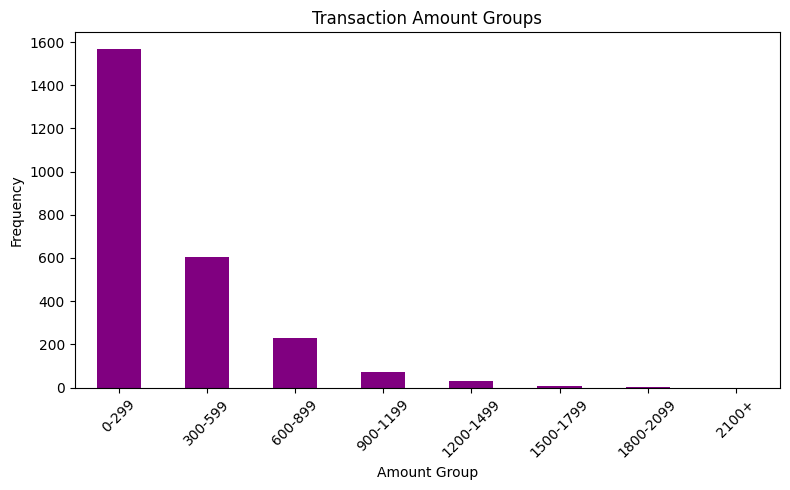

--- Univariate Analysis: Customer Age ---


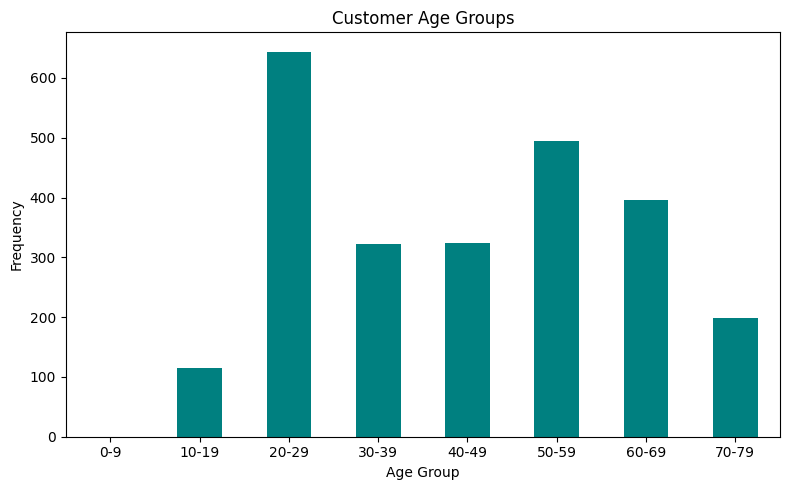

--- Univariate Analysis: Login Attempts ---


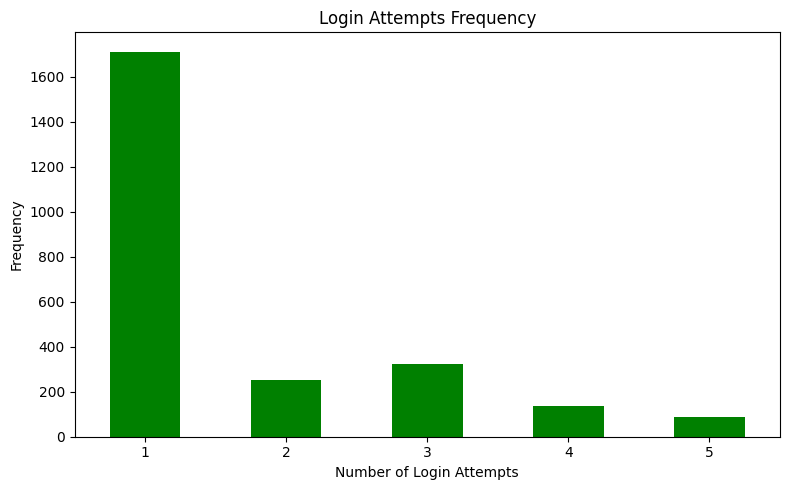

--- Univariate Analysis: Account Balance ---


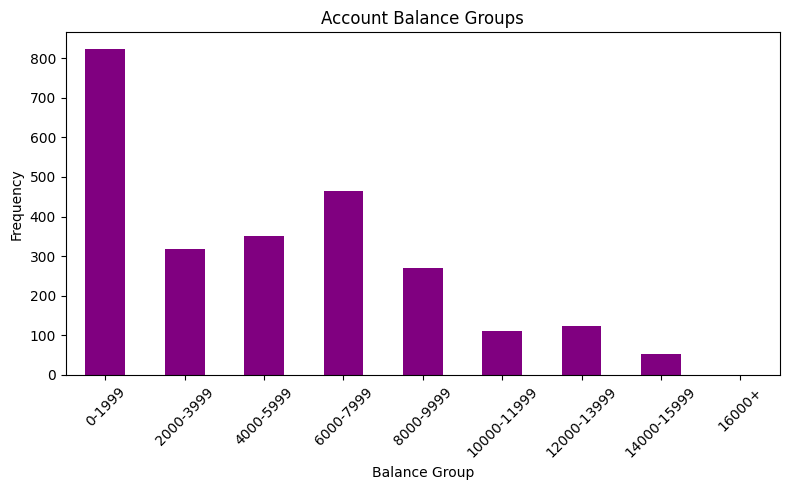

--- Channel Distribution ---


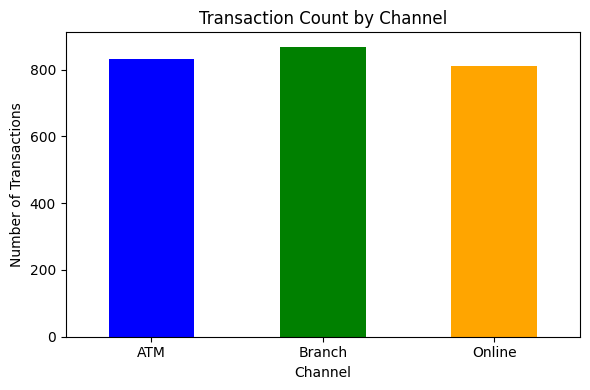

In [39]:
#  Univariate Analysis
grapher = Graph(data.get_data())
uni_analyzer = UnivariateAnalysis(data.get_data(), grapher)

uni_analyzer.analyze_transaction_amount()
uni_analyzer.analyze_customer_age()
uni_analyzer.analyze_login_attempts()
uni_analyzer.analyze_account_balance()
uni_analyzer.analyze_channel_distribution()

# Bivariate Analysis


--- Bivariate Analysis: Fraud by Account Balance ---


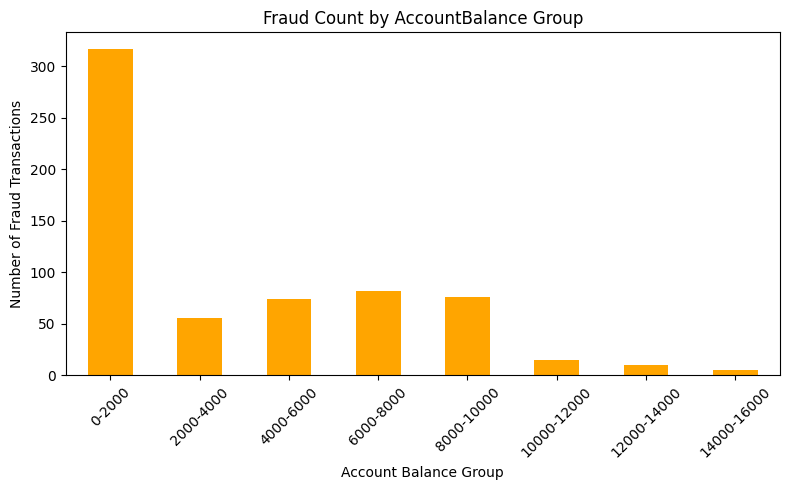

--- Bivariate Analysis: Fraud by Customer Age ---


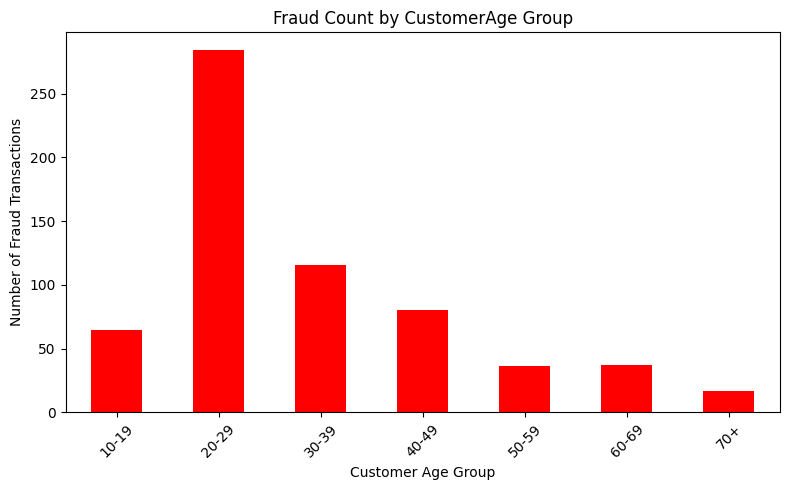

--- Bivariate Analysis: Fraud by Transaction Amount ---


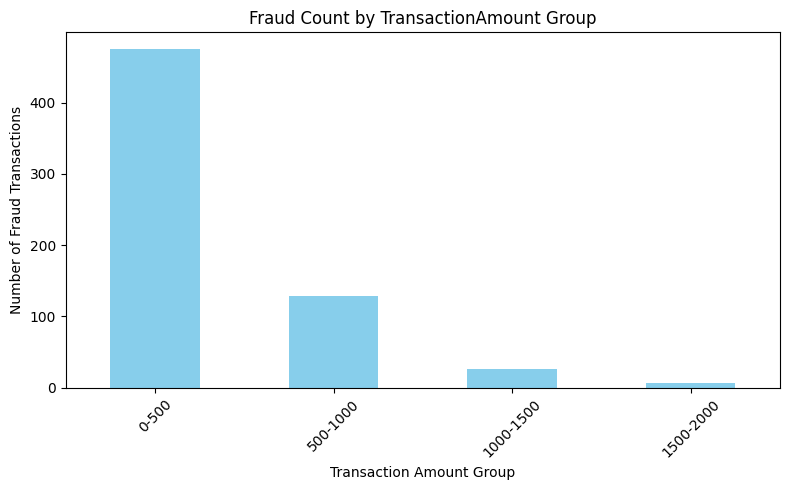

--- Bivariate Analysis: Fraud by Channel ---


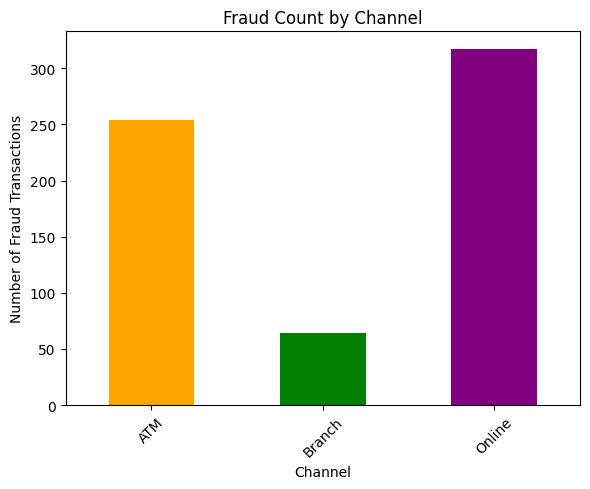

--- Bivariate Analysis: Fraud by Login Attempts ---


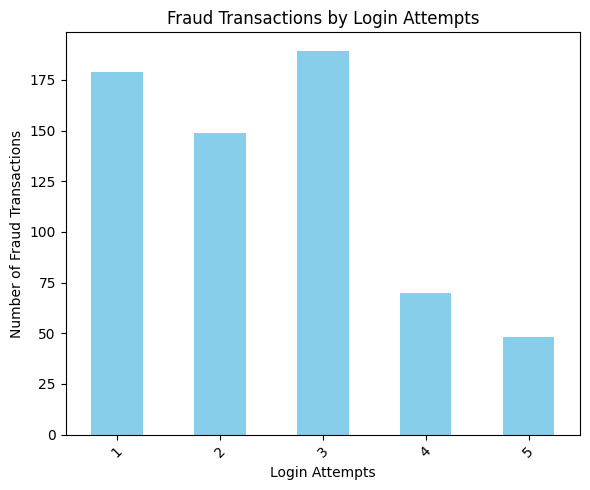

In [40]:
# Bivariate Analysis
bi_analyzer = BivariateAnalysis(data.get_data(), grapher)

bi_analyzer.analyze_fraud_by_account_balance()
bi_analyzer.analyze_fraud_by_customer_age()
bi_analyzer.analyze_fraud_by_transaction_amount()
bi_analyzer.analyze_fraud_by_channel()
bi_analyzer.analyze_fraud_by_login_attempts()

# Model Training and Evaluation



In [27]:
# Model Training and Evaluation
feature_cols = ['TransactionAmount', 'CustomerAge', 'AccountBalance', 'ChannelEncoded', 'LoginAttempts']
target_col = 'is_fraud'

# Use the preprocessor instance from Cell 10 or get data from data
current_df_for_ml = data.get_data()
X, y = current_df_for_ml[feature_cols], current_df_for_ml[target_col] # Simpler separation

ml_model_handler = Model()

X_train, X_test, y_train, y_test = ml_model_handler.split_data(X, y)
scaler_obj, X_train_scaled, X_test_scaled = ml_model_handler.scale_data(X_train, X_test)
svm_model_obj = ml_model_handler.train_svm(X_train_scaled, y_train)
y_pred = ml_model_handler.predict(X_test_scaled)
ml_model_handler.evaluate_model(y_test, y_pred)


--- Model Performance ---
Accuracy: 0.8091
Confusion Matrix:
[[352  24]
 [ 72  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       376
           1       0.70      0.43      0.53       127

    accuracy                           0.81       503
   macro avg       0.76      0.68      0.71       503
weighted avg       0.80      0.81      0.79       503



#  Pickling and Prediction


In [28]:
#  Pickling and Prediction
pickler = PickleData()

pickler.save_object(ml_model_handler.get_model(), 'svm_model.pkl')
pickler.save_object(ml_model_handler.get_scaler(), 'scaler.pkl')

# Sample 1
sample_1_data = {'TransactionAmount': [1500], 'CustomerAge': [35],
                 'AccountBalance': [25000], 'ChannelEncoded': [0], 'LoginAttempts': [1]}
random_sample_1 = pd.DataFrame(sample_1_data)
prediction_1 = pickler.predict_with_loaded_model(
    model_path='svm_model.pkl',
    scaler_path='scaler.pkl',
    sample_data=random_sample_1[feature_cols] # Ensure column order
)
print(f"Prediction for random sample 1: {prediction_1[0]}")

# Sample 2
sample_2_data = {'TransactionAmount': [500], 'CustomerAge': [25],
                 'AccountBalance': [25000], 'ChannelEncoded': [0], 'LoginAttempts': [3]}
random_sample_2 = pd.DataFrame(sample_2_data)
prediction_2 = pickler.predict_with_loaded_model(
    model_path='svm_model.pkl',
    scaler_path='scaler.pkl',
    sample_data=random_sample_2[feature_cols] # Ensure column order
)
print(f"Prediction for random sample 2: {prediction_2[0]}")

Object saved to svm_model.pkl
Object saved to scaler.pkl
Object loaded from svm_model.pkl
Object loaded from scaler.pkl
Prediction for random sample 1: 0
Object loaded from svm_model.pkl
Object loaded from scaler.pkl
Prediction for random sample 2: 1
